<center>
<img src='./img/nsidc_logo.png'/>

# **IceFlow**
### Point Cloud Data Access
</center>

---
<div>
<img align="right" width="50%" height="200px" src='./img/vaex.png'/>
</div>

## Learning Goals
This Jupyter notebook is an **interactive document** to teach students and researchers interested in cryospheric sciences how to access and work with airborne altimetry and related data sets from NASA’s [IceBridge](https://www.nasa.gov/mission_pages/icebridge/index.html) mission, and satellite altimetry data from [ICESat/GLAS](https://icesat.gsfc.nasa.gov/icesat/) and [ICESat-2](https://icesat-2.gsfc.nasa.gov/) using the NSIDC **IceFlow API**.

> If you want to know what an API is, take a look at this video: ["What is an API?"](https://www.youtube.com/watch?v=s7wmiS2mSXY) 

#### **Knowledge Requirements**

To get the most out of this notebook you should be familiar with Python and its geoscience stack. If you only know some python that's also O.K. Most of the "heavy lifting" is done with our IceFlow client code so you don't necessarily need to know a lot about these libraries. If you feel like learning more about geoscience and Python there are a great turorials by CU Boulder's Earth Lab here: [Data Exploration and Analysis Lessons](https://www.earthdatascience.org/tags/data-exploration-and-analysis/) or from the Data Carpentry project: [Introduction to Geospatial Concepts](https://datacarpentry.org/organization-geospatial/)


The main packages that we are going to use are:

 * [requests](https://requests.readthedocs.io/en/master/):
 HTTP library for Python, used to make requests.
 * [geopandas](https://geopandas.org/):
 Library to simplify working with geospatial data in Python (using ```pandas```). 
 * [geojson](https://github.com/jazzband/geojson):
 Functions for encoding and decoding GeoJSON formatted data in Python
 * [h5py](https://github.com/h5py/h5py):
 Pythonic wrapper around the the [HDF5 library](https://en.wikipedia.org/wiki/Hierarchical_Data_Format). 
 * [matplotlib](https://matplotlib.org/):
 Comprehensive library for creating static, animated, and interactive visualizations in Python.
 * [vaex](https://github.com/vaexio/vaex):
 High performance Python library for lazy Out-of-Core DataFrames (similar to ```pandas```), to visualize and explore big tabular datasets.
 * [iPyLeaflet](https://github.com/jupyter-widgets/ipyleaflet):
 Jupyter / Leaflet bridge enabling interactive maps in the Jupyter notebook.
 * [IcePyx](https://github.com/icesat2py/icepyx):
 Library for ICESat-2 data users
  
As already mentioned, for convenience we created a Python library that encapsulates the most repetitive tasks to access IceFlow and ICESat-2 data. 

#### **If you feel comfortable just using code you don't need to use the map widget, take a look at the [API usage notebook](./2_api.ipynb)**

After completing this notebook and the companion [visualization and analysis notebook](./3_dataviz.ipynb) you will:
* Understand the basics about the datasets (pre-IceBridge, IceBridge, ICESat/GLAS and ICE-Sat-2) served by IceFlow;
* Be able to access these data sets using the IceFlow API;
* Be able to read and analyze the data using IceFlow.

## **Why IceFlow**

#### The short answer is **data harmonization**

In 2003, NASA launched the Ice, Cloud and Land Elevation Satellite mission with the Geosience Laser Altimeter System (ICESat/GLAS) instrument onboard. Over the following six years, ICESat/GLAS collected valuable ice thickness data in the Polar Regions. Unfortunately, the ICESat/GLAS mission ended before a follow-up mission could be launched. An airborne campaign called Operation IceBridge was funded to fill the gap and continue ice thickness measurements. Between 2009 and 2019, Operation IceBridge flew numerous campaigns over the Greenland, the Antarctic icesheets, and sea ice in the Arctic and Southern Ocean. The last campaign was fill in date here. In September 2018, ICESat-2 was launched to continue NASA's collection of ice, cloud and land elevation data.

The wealth of data from these three missions, as well as from pre-IceBridge airborne altimetry missions, presents an opportunity to study the evolution of ice thickness over several decades. However, combining data from these missions presents several challenges:
* Data from the Airborne Topographic Mapper (ATM) flown during IceBridge campaigns is stored in at least 4 different file formats. ICESat/GLAS and ICESat-2 data are also in different file formats. Data needs to be harmonized i.e. put into similar formats before comparisons can be made.
* The coordinate reference systems used to locate measurements have changed over the years, as the Earth's surface is not static and changes shape. To account for these changes, terrestrial reference frames that relate latitude and longitude to points on the Earth are updated on a regular basis. Since the launch of ICESat/GLAS, the International Terrestrial Reference Frame[(ITRF)](https://www.iers.org/IERS/EN/DataProducts/ITRF/itrf.html) has been updated three times. The geolocation accuracy of instruments means that a point measured at the beginning of the record is not the same point as that measured at the end of the record. Even though the latitude and longitude is the same. These changes in geolocation need to be reconciled to allow meaningful comparisons within the long term data record.


#### A more detailed overview of these corrections can be found in **[Applying Coordinate Transformations to Facilitate Data Comparison](corrections.ipynb)**



### **Pre-IceBridge**

The Airborne Topographic Mapper (ATM) is a conically-scanning laser altimeter that measures the surface topography of a swath of terrain directly beneath the path of the aircraft. ATM surveys can be used for change detection, with laser swaths re-surveyed after a few years, and differences between the two surveys yielding estimates of elevation change during the interim.  Comparison of surveys in 1993-4 and 1998-9 produced the first comprehensive assessment of the mass balance of the Greenland ice sheet (Krabill et al., 1999, 2000).  ATM surveys can also be used for comparison with satellite altimeter measurements for calibration/validation (e.g. Martin et al., 2005) or for determining elevation change.  The ATM has collected high quality topographic data from a wide variety of platforms, including the NASA P3, a Chilean Navy P3, a US Navy P3, the NASA DC8, the NCAR C-130, and a half-dozen Twin Otters. For a complete list of the ATM deployments you can go to [https://atm.wff.nasa.gov/deployments/](https://atm.wff.nasa.gov/deployments/)

### **ICESat**

ICESat (Ice, Cloud,and land Elevation Satellite) was the benchmark Earth Observing System mission for measuring ice sheet mass balance, cloud and aerosol heights, as well as land topography and vegetation characteristics. From 2003 to 2009, the ICESat mission provided multi-year elevation data needed to determine ice sheet mass balance as well as cloud property information, especially for stratospheric clouds common over polar areas. It also provided topographic and vegetation data around the globe, in addition to the polar-specific coverage over the Greenland and Antarctic ice sheets. Launched on 12 January 2003, after seven years in orbit and 18 laser-operations campaigns, the ICESat's science mission ended due to the failure of its primary instrument.


### **IceBridge**

**IceBridge** is the largest airborne survey of Earth's polar ice ever flown. It has yielded an unprecedented three-dimensional view of Arctic and Antarctic ice sheets, ice shelves and sea ice. These flights provide a yearly, multi-instrument look at the behavior of the rapidly changing features of the Greenland and Antarctic ice.
Data collected during IceBridge helps scientists bridge the gap in polar observations between NASA's Ice, Cloud and Land Elevation Satellite (ICESat) -- launched in 2003 and de-orbited in 2010 -- and ICESat-2, launched in 2018. ICESat stopped collecting science data in 2009, making IceBridge critical for extending the ice altimetry time series in the Arctic and Antarctica, although the data are not continuous.

IceBridge flights were generally conducted in **March-May over Greenland and in October-November over Antarctica**.

### **ICESat 2**

The ICESat-2 mission is designed to provide elevation data needed to determine ice sheet mass balance as well as vegetation canopy information. It will provide topographic measurements of cities, lakes and reservoirs, oceans and land surfaces around the globe. The sole instrument on ICESat-2 is the Advanced Topographic Laser Altimeter System (ATLAS), a space-based Lidar. It was designed and built at Goddard Space Flight Center, with the laser generation and detection systems provided by Fibertek. ATLAS measures the travel time of laser photons from the satellite to Earth and back; computer programs use the travel time from multiple pulses to determine elevation.

**Note: Data from ICESat-2 is not part of ICeFlow but we provide access to it using the [IcePyx](https://github.com/icesat2py/icepyx) library**

You can go to NSIDC's landing page for a complete list of IceSat 2 datasets and their documentation: [ICESat-2 Data Sets at NSIDC](https://nsidc.org/data/icesat-2/data-sets)

<p align="center">
<img style="align: center;" width="80%" src='./img/iceflow-coverage.jpg'/>
    <br>
    <b>Fig 2. IceFlow mission coverages</b>
</p>


## Data sets and their coverage


The IceFlow project provides web services for ordering spatially and temporally subseted Lidar point cloud data from the [BLATM L1B](https://nsidc.org/data/BLATM1B), [ILATM L1B v1](https://nsidc.org/data/ilatm1b/versions/1), [ILATM L1B V2](https://nsidc.org/data/ILATM1B), [ILVIS2](https://nsidc.org/data/ILVIS2) and [IceSat GLAH06](https://nsidc.org/data/GLAH06/) data products.

The following table describes the temporal and spatial coverage of each of these dataset as well as the sensor and platform used to acquire the data.

**Important:** The IceFlow API unifies ATM into one category, so when you request pre-IceBridge and IceBridge data you can have a more continuous coverage.


---


|              | Spatial Coverage                                                      | Temporal Coverage                              | Platform                                              | Sensor                   | IceFlow Name
|--------------|-----------------------------------------------------------------------|------------------------------------------------|-------------------------------------------------------|--------------------------|--------------------------|
| [BLATM L1B](https://nsidc.org/data/BLATM1B)    | South: N:-53, S: -90, E:180, W:-180 North: N:90, S: 60, E:180, W:-180 | 23 June 1993 - 30 October 2008                 | DC-8, DHC-6, P-3A ORION, P-3B                         | ATM                     | **ATM1B**
| [ILATM L1B v1](https://nsidc.org/data/ilatm1b/versions/1) | South: N:-53, S: -90, E:180, W:-180 North: N:90, S: 60, E:180, W:-180 | 31 March 2009 - 8 November 2012 (updated 2013) | AIRCRAFT, DC-8, P-3B                                  | ATM                      | **ATM1B**
| [ILATM L1B V2](https://nsidc.org/data/ILATM1B)| South: N:-53, S: -90, E:180, W:-180 North: N:90, S: 60, E:180, W:-180 | 20 March 2013 - 16 May 2019 (updated 2020)     | C-130, DC-8, HU-25A, HU-25C, P-3B, WP-3D ORION        | ATM                      | **ATM1B**
| [ILVIS2](https://nsidc.org/data/ILVIS2)       | North: N:90, S: 60, E:180, W:-180                                     | 25 August 2017 - 20 September 2017             | AIRCRAFT, B-200, C-130, DC-8, G-V, HU-25C, P-3B, RQ-4 | ALTIMETERS, LASERS, LVIS | **ILVIS2**
| [GLAH06](https://nsidc.org/data/GLAH06/)       | Global: N:86, S: -86, E:180, W:-180                                     |     20 February 2003 - 11 October 2009        | IceSat | ALTIMETERS, CD, GLAS, GPS, GPS Receiver, LA, PC | **GLAH06**


--- 

> **Note**: If you have any qustions about the data please contact NSIDC user services at nsidc@nsidc.org

In this tutorial we are going to use iPyLeaflet and other Jupyter widgets to select our constraints and place a data order using the IceFlow API.

### NASA's Earthdata Credentials

The first step to start working with IceFlow data is to login into [NASA's Earthdata](https://urs.earthdata.nasa.gov/).

> **Note**: you don't need to be a NASA employee to register with NASA Earthdata!


In [ ]:
# We import our IceFlow client library
from iceflow.ui import IceFlowUI
# We instantiate our client
ui = IceFlowUI()
# We need to use our NASA Earthdata Credentials and verify that they work.
# Please click on set credentials and then see if we are authenticated by executing the next cell.
ui.display_credentials()

In [ ]:
# We are going to verify that our credentials are valid. This may take a little while, if it fails for some reason try again.
# NOTE: Wednesday mornings are usually downtime for NSIDC services.
authorized = ui.authenticate()
if authorized is None:
    print('we are not logged into NASA Earthdata')
else:
    print('we are logged into NASA Earthdata!')

## IceFlow Access Widget
The IceFlow access widget is a tool to visualize flightpaths from IceBridge, draw a region of interest, set spatio-temporal parameters and place data orders to the IceFlow API.
The output of the operations performed in the widget can be seen in the log window (right-most icon on at the bottom) 
<img src='./img/log-icons.png'> or by slecting it on the View menu **Show log console**

> Note: the widget is stateless, if you change any parameter you will have to redraw your bounding box or polygon. This is a temporary artifact.

In [ ]:
# Let's start with the user interface. We'll explain what this does next.
# vertical = Sidecar widget, horizontal = render the widget in this notebook.
ui.display_map('vertical', extra_layers=True)

file_urlsThis user interface uses [ipylaflet](https://blog.jupyter.org/interactive-gis-in-jupyter-with-ipyleaflet-52f9657fa7a) which allows us to draw
polygons or bounding boxes to delimit our area of interest. We can also edit and delete these geometries using the the widget controls in the map.

The **"Get Granule Count"** button will query [NASA's CMR](https://earthdata.nasa.gov/eosdis/science-system-description/eosdis-components/cmr) to get a granule count for the current parameters, we need to have a geometry and one or more datasets selected.

The **Place Data Order** button will submit an IceFlow order using the current UI parameters, this is an **async** process, we 'll have to wait until the order is completed.

The **Check Order Status** button will output the status of the order 

The **Download Data Order** button will download the data from an orders that has been fulfilled.

**Notes**: 
> * If you use the bounding box geometry in a polar projection you'll notice a distortion due the nature of polar coordinates, if you prefer you can use the global mercator map to draw a bounding box without apparent distortion. Polygons are probably a better idea or you can even input your own coordinates as we'll see later.
> * The calculated download size of these granules is an upper bound since IceFlow allows us to subset the data. 

### IceFLow notebook interface components
> **Hemisphere**: Which map projection we are going to use, we can pick global, north or south

> **Datasets**: A selection of the datasets served by IceFlow, we can pick one or more (CTRL+ Space or CTRL+Click) In the widget ATM includes the 3 different ATM products (BLATM L1B, ILATM L1B v1, ILATM L1B V2)

> **ITRF**: The International Terrestrial Reference Frame see: [ITRF](corrections.ipynb)

> **Epoch**: The epoch in which the coordinate reference systems are based, valid when using ITRF. (if you use say 2010.1 and ITRF 2014 then all the points will be shifted to match the best ground representation as if they were in 2010. This is compensating for plate techtonic motion)

> **Date Range**: A slider control to filter the selection area between a start and end date

> **Map**: The main widget, you can draw polygon or bounding boxes and edit them. You can also turn on and off the layers that show IceBridge flights and the rest.

> **ICESat2**: If we want to also place a data order for IceSat 2 data(using IcePyx) for the current parameters we need to select the short name code i.e. ATL06

### NASA Common Metadata Repository (CMR)

What is CMR?

NASA's Common Metadata Repository (CMR) is a metadata system that catalogs all data and service metadata records for NASA's Earth Observing System Data and Information System (EOSDIS) system and will be the authoritative management system for all EOSDIS metadata. These metadata records are registered, modified, discovered, and accessed through programmatic interfaces leveraging standard protocols and APIs. 

In short: NASA's CMR is a "database" for Earth-related datasets, in this case **all the data served by IceFlow is also indexed by CMR**

One **important** thing to notice here is that CMR has the location of the original data granules and thus they are in multiple data formats and projections. Again, here is where tools like IceFlow come in handy. Also, the data size calculation for CMR granules is an upper bound since CMR does not subset the data.

In [ ]:
# Use the widget statate to build spatio-temporal parameters
params = ui.build_parameters()
params

In [ ]:
# We can query CMR to get an idea of coverages for the area we just selected.
# The granules and total size is an upper bound since CMR has full granules
# and IceFlow will subset them to only cover the area selected.
granules = ui.query_cmr(params=params)

## Placing a data order and downloading the granules for data sets served by IceFlow

Now that we have our constraints we just need to post our order and wait for IceFlow to fulfill it. The map widget has a button to this end, we can also put an order directly. We are going to get data from [Thwaites Glacier](https://en.wikipedia.org/wiki/Thwaites_Glacier) in Antarctica for this example (commented out there is another example for [Jakobshavn](https://en.wikipedia.org/wiki/Jakobshavn_Glacier) glacier in Greenland ). **First we are going to take a look at the granules IceFlow will subset and harmonize for us**


In [ ]:
# 10 years of data over Thwaites glacier, Pre IceBridge, ICESat, and IceBridge data in one place!! and harmonized too!!
my_params ={
    'datasets': ['ILVIS2', 'GLAH06', 'ATM1B', 'ATL06'],
    'ITRF': '2014',
    'epoch': '2014.1',
    'start': '1993-11-01',
    'end': '2018-12-01',
    'bbox': '-107.846213,-75.388899,-105.857964,-74.991818'
}

# Jakobshavn
# my_params ={
#     'datasets': ['ATM1B', 'GLAH06', 'ILVIS2'],
#     'start': '1994-01-01',
#     'end': '2018-12-31',
#     'bbox': '-107.4515,-75.3695,-105.3794,-74.4563'
# }

# returns a json dictionary, the request parameters and the order's response.
granules_metadata = ui.query_cmr(params=my_params)

### Plancing the data order

After we place an order in IceFlow a few things will happen, first we'll get a notification email that our order has been accepted and is being processed.

In [ ]:
orders = ui.place_data_orders(params=my_params)
orders

### Downloading the data
Let's get some coffee, some IceFlow orders are in the Gigabytes realm and may take a little while to be processed.

In [ ]:
for order in orders:
    status = ui.order_status(order)
    if status['status'] == 'COMPLETE':
        ui.download_order(order)

### Placing **ICESat 2** data orders using IceFlow

IceFlow can place ICESat 2 data orders using **IcePyx**, the data ordered here will be downloaded synchronously. 

ICESat 2 data orders can be really, really big so before placing an order check the estimated download size querying CMR.

In [ ]:
# ICESat and ICESat 2
my_params ={
    'datasets': ['GLAH06', 'ATL06'],
    'start': '2003-01-01',
    'end': '2019-01-01',
    'bbox': '-107.4515,-75.3695,-105.3794,-74.4563'
}
# This will query CMR for unsubsetted granules using the dataset's most recent version.
granules_metadata = ui.query_cmr(params=my_params)

In [ ]:
# ICESat 2 + ICESat
orders = ui.place_data_orders(params=my_params)

In [ ]:
# Downloading the data, ICESat 2 will be downloaded right away.
for order in orders:
    status = ui.order_status(order)
    if status['status'] == 'COMPLETE':
        ui.download_order(order)

# Reading the Data

Remote sensing data can be overwhelmingly big. Reading a big file is not trivial and when we have an array of them this task can become an intractable barrier.
The main constraint if you don't have a super computer is memory. The average granule size is in the 10s of MB for IceSat 2 and could be Gigabytes in IceFlow depending on the selected area. This is when libraries like Dask, Vaex and others come into play. 

These libraries read our files using a battery of optimizations like lazy loading, memory mapping and parallelism. Let's now explore different ways of reading these HDF5 files using libraries included in this notebook:

* h5py + GeoPandas
* xarray

Other libraries that you can use to read and work with these files, especially if they are big and need out of core computations:

* Vaex
* Dask

## What's in the IceFlow HDF5 file?

Depending on what dataset you requested data from, the keys will be different. It's important to note that while IceFlow will harmonize the data by using a common frame of reference and by transforming the native formats into HDF5, it will not change the name of the variables form the original datasets. As a result of this, your variables of interest are going to be named differently from say ATM data from IceBridge to GLASS data from ICESat or ATL06 data from ICESat-2.


In [1]:
import h5py
glass_file = 'data/twaties-test-GLAH06-2000-2010.h5'
ib_file = 'data/atm1b_data_2020-11-15T20-05.hdf5'
is2_file = 'data/processed_ATL06_20181015100401_02560110_003_01.h5'

print('\nICESat keys:')
glass_df = h5py.File(glass_file, 'r')
display(glass_df.keys())

print('\nIceBridge keys:')
ib_df = h5py.File(ib_file, 'r')
display(ib_df.keys())

print('\nICESat-2 keys:')
is2_df = h5py.File(is2_file, 'r')
display(is2_df.keys())



ICESat keys:


<KeysViewHDF5 ['FRir_qa_flg', 'att_calc_pad_flg', 'att_lpa_flg', 'att_pad_use_flg', 'd_DEM_elv', 'd_ElevBiasCorr', 'd_FRir_cldtop', 'd_FRir_intsig', 'd_GmC', 'd_RecNrgAll', 'd_SigBegOff', 'd_SigEndOff', 'd_TrshRngOff', 'd_TxNrg', 'd_beamAzimuth', 'd_beamCoelv', 'd_cntRngOff', 'd_d2refTrk', 'd_dTrop', 'd_deltaEllip', 'd_elev', 'd_eqElv', 'd_erElv', 'd_gdHt', 'd_isRngOff', 'd_kurt2', 'd_lat', 'd_ldElv', 'd_ldRngOff', 'd_lon', 'd_maxRecAmp', 'd_maxSmAmp', 'd_ocElv', 'd_ocRngOff', 'd_pctSAT', 'd_poTide', 'd_refRng', 'd_reflctUC', 'd_sDevNsOb1', 'd_satElevCorr', 'd_satNrgCorr', 'd_siRngOff', 'd_skew2', 'd_wTrop', 'elev_use_flg', 'elv_cloud_flg', 'elv_cnt_1_flg', 'elv_cnt_2_flg', 'elv_gauss_flg', 'elv_other_flg', 'elv_peak_1_flg', 'elv_peak_2_flg', 'elv_thres_flg', 'i_DEM_hires_src_1', 'i_gval_rcv', 'i_nPeaks1', 'i_numPk', 'i_rec_ndx', 'i_satNdx', 'i_shot_count', 'rng_uqf_cent1_flg', 'rng_uqf_cent2_flg', 'rng_uqf_is_flg', 'rng_uqf_ld_flg', 'rng_uqf_oc_flg', 'rng_uqf_si_flg', 'rng_uqf_sigbeg1


IceBridge keys:


<KeysViewHDF5 ['azimuth', 'elevation', 'gps_pdop', 'gps_time', 'latitude', 'longitude', 'passive_footprint_latitude', 'passive_footprint_longitude', 'passive_footprint_synthesized_elevation', 'passive_signal', 'pitch', 'pulse_width', 'rcv_sigstr', 'rel_time', 'roll', 'utc_datetime', 'xmt_sigstr']>


ICESat-2 keys:


<KeysViewHDF5 ['METADATA', 'ancillary_data', 'gt1l', 'gt1r', 'gt2l', 'gt2r', 'gt3l', 'gt3r', 'orbit_info', 'quality_assessment']>

### The IceFlow notebook client provides a common way of getting the main 4 variables in point cloud data (non grided) for ICESat and IceBridge data.

* longitude
* latitude
* elevation
* time

```python
from iceflow.processing import IceFlowProcessing
import geopandas as gdp
atm1b_if = IceFlowProcessing('data/atm1b_granule_2009.h5')
glass_if = IceFlowProcessing('data/glah06_granule_2006.h5')

ib_gdf = atm1b_if.to_geopandas
glass_gdf = glass_if.to_geopandas()

stacked_df = gpd.GeoDataFrame(pd.concat( [ib_gpdf, glass_gpdf], ignore_index=True))

```
this will open the file, grab the 4 main variables described avobe and return a geopandas dataframe. In this dataframe the name of these variables will be the same and we could stack them with data from other datasets i.e. GLAH06 from ICESat.

In [2]:
# importing some libraries to work with the data
import warnings
warnings.filterwarnings("ignore")
import glob
import pandas as pd
import geopandas as gpd
# IceflowProcessing is a wrapper to work with HDF5 files
from iceflow.processing import IceFlowProcessing

# Pre IceBridge ATM granule data
atm1b_if = IceFlowProcessing('data/atm1b_data_2020-11-15T20-05.hdf5')
# ICESat granule data
glass_if = IceFlowProcessing('data/twaties-test-GLAH06-2000-2010.h5')

pre_ib_gdf = atm1b_if.to_geopandas()
glass_gdf = glass_if.to_geopandas()

display(pre_ib_gdf.head(), pre_ib_gdf.shape)
display(glass_gdf.head(), glass_gdf.shape)


,latitude,longitude,elevation,time,geometry
0,-75.276492,-105.394557,108.382004,2002-11-28 19:34:56.257,POINT (-105.39456 -75.27649)
1,-75.276455,-105.394511,108.391998,2002-11-28 19:34:56.257,POINT (-105.39451 -75.27645)
2,-75.276418,-105.394469,108.234001,2002-11-28 19:34:56.257,POINT (-105.39447 -75.27642)
3,-75.276381,-105.394433,108.156998,2002-11-28 19:34:56.257,POINT (-105.39443 -75.27638)
4,-75.276345,-105.394401,107.953003,2002-11-28 19:34:56.258,POINT (-105.39440 -75.27635)


(436439, 5)

,latitude,longitude,elevation,time,geometry
0,-75.330202,-105.341199,236.777,2003-02-25 11:15:44.377777,POINT (-105.34120 -75.33020)
1,-75.328719,-105.342984,237.621,2003-02-25 11:15:44.402777,POINT (-105.34298 -75.32872)
2,-75.327238,-105.344776,236.192,2003-02-25 11:15:44.427777,POINT (-105.34478 -75.32724)
3,-75.325758,-105.346574,232.466,2003-02-25 11:15:44.452777,POINT (-105.34657 -75.32576)
4,-75.324280,-105.348378,226.501,2003-02-25 11:15:44.477777,POINT (-105.34838 -75.32428)


(42436, 5)

In [5]:
# We are going to stack 2 geopandas dataframes
stacked_df = gpd.GeoDataFrame(pd.concat( [pre_ib_gdf, glass_gdf], ignore_index=True))
display(stacked_df.head(), stacked_df.shape)

,latitude,longitude,elevation,time,geometry
0,-75.276492,-105.394557,108.382004,2002-11-28 19:34:56.257,POINT (-105.39456 -75.27649)
1,-75.276455,-105.394511,108.391998,2002-11-28 19:34:56.257,POINT (-105.39451 -75.27645)
2,-75.276418,-105.394469,108.234001,2002-11-28 19:34:56.257,POINT (-105.39447 -75.27642)
3,-75.276381,-105.394433,108.156998,2002-11-28 19:34:56.257,POINT (-105.39443 -75.27638)
4,-75.276345,-105.394401,107.953003,2002-11-28 19:34:56.258,POINT (-105.39440 -75.27635)


(478875, 5)

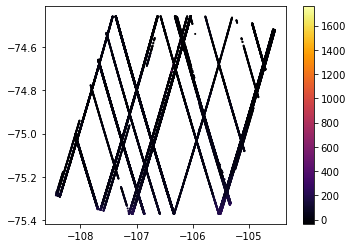

In [7]:
glass_gdf.plot('elevation', markersize=1, cmap='inferno', legend=True)

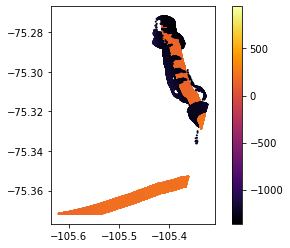

In [8]:
pre_ib_gdf.plot('elevation', markersize=1, cmap='inferno', legend=True)

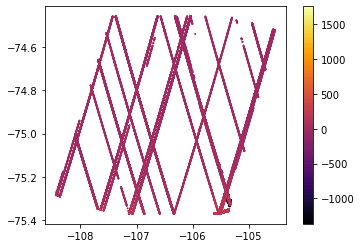

In [6]:
# plotting 2 NASA missions on the same dataframe! 
stacked_df.plot('elevation', markersize=1, cmap='inferno', legend=True)

### References
1. [Airborne Topographic Mapper Calibration Procedures and Accuracy Assessment](https://ntrs.nasa.gov/archive/nasa/casi.ntrs.nasa.gov/20120008479.pdf)

2. [Open Source Tools for Point Cloud Processing, Storage, Subsetting, and Visualization](https://sea.ucar.edu/sites/default/files/kbeam_seaconf18.pdf)

### Related Tools

* [OpenAltimetry](https://openaltimetry.org/): Advanced discovery, processing, and visualization services for ICESat and ICESat-2 altimeter data
* [ITS_LIVE](https://its-live.jpl.nasa.gov/):A NASA MEaSUREs project to provide automated, low latency, global glacier flow and elevation change datasets. 